<a href="https://colab.research.google.com/github/ImtiazAhmed07/Navigator/blob/main/Navigator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install matplotlib
!pip install networkx
!pip install csv23

Cities CSV headers: ['City', 'Latitude', 'Longitude']
Distances CSV headers: ['City1', 'City2', 'Distance']
Enter the start city (or type 'exit' to quit): Rawalpindi
Enter the goal city: Karachi
Path from Rawalpindi to Karachi: ['Rawalpindi', 'Islamabad', 'Karachi']
Total cost: 1378.0


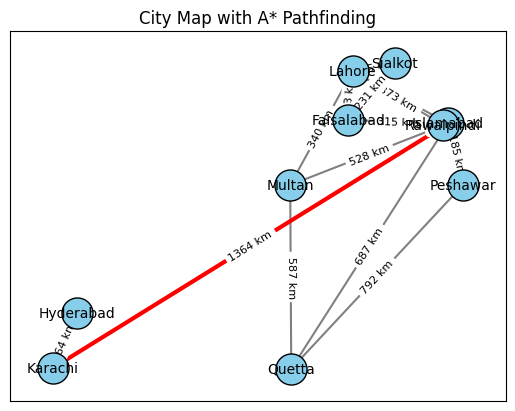

In [ ]:
import csv
import math
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Load the datasets
def load_cities(file_path):
    cities = {}
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames
        print(f"Cities CSV headers: {headers}")  # Debugging line
        for row in reader:
            cities[row['City']] = (float(row['Latitude']), float(row['Longitude']))
    return cities

def load_distances(file_path):
    distances = {}
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        reader = csv.DictReader(file)
        headers = reader.fieldnames
        print(f"Distances CSV headers: {headers}")  # Debugging line
        for row in reader:
            if row['City1'] not in distances:
                distances[row['City1']] = {}
            if row['City2'] not in distances:
                distances[row['City2']] = {}
            distances[row['City1']][row['City2']] = float(row['Distance'])
            distances[row['City2']][row['City1']] = float(row['Distance'])
    return distances

# Heuristic function: Euclidean distance
def heuristic(city1, city2, cities):
    lat1, lon1 = cities[city1]
    lat2, lon2 = cities[city2]
    return math.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

# A* Algorithm
def a_star_search(start, goal, cities, distances):
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal, cities), 0, start, []))
    closed_list = set()

    while open_list:
        _, cost, current_city, path = heapq.heappop(open_list)

        if current_city in closed_list:
            continue

        path = path + [current_city]

        if current_city == goal:
            return path, cost

        closed_list.add(current_city)

        for neighbor, distance in distances[current_city].items():
            if neighbor not in closed_list:
                new_cost = cost + distance
                heapq.heappush(open_list, (new_cost + heuristic(neighbor, goal, cities), new_cost, neighbor, path))

    return None, float('inf')

# Plotting the graph
def plot_graph(cities, distances, path):
    G = nx.Graph()

    for city, coords in cities.items():
        G.add_node(city, pos=coords)

    for city1, neighbors in distances.items():
        for city2, distance in neighbors.items():
            G.add_edge(city1, city2, weight=distance)

    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes with specific properties
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', edgecolors='black')

    # Draw edges with weights
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.5, edge_color='gray')

    # Highlight the path edges
    if path:
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red')

    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

    # Draw edge labels (distances)
    edge_labels = {(city1, city2): f'{int(distances[city1][city2])} km' for city1 in distances for city2 in distances[city1]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

    plt.title("City Map with A* Pathfinding")
    plt.show()

# File paths
cities_file_path = r'/content/Pakistn_cities.csv'
distances_file_path = r'/content/Pakistan_distances2.csv'

# Load data
cities = load_cities(cities_file_path)
distances = load_distances(distances_file_path)

# Main loop for continuous input
while True:
    # Take user input for start and goal cities
    start_city = input("Enter the start city (or type 'exit' to quit): ")
    if start_city.lower() == 'exit':
        break
    goal_city = input("Enter the goal city: ")

    # Perform A* search
    path, cost = a_star_search(start_city, goal_city, cities, distances)

    print(f"Path from {start_city} to {goal_city}: {path}")
    print(f"Total cost: {cost}")

    # Plot the graph with the path
    plot_graph(cities, distances, path)
